# Homework 2 Part 2 

**Due: Wednesday, October 5 @ 11:59pm**

### I strongly recommend you to use HiPerGator to solve this assignment

Open On-Demand: [ood.rc.ufl.edu](https://ood.rc.ufl.edu/)

### Import Libraries and magics

In [20]:
# load libraries and magics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


---

# Question 1

Consider the [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) with 30 numerical attributes described below and a total of 569 samples. Each sample is labeled as malignant (class 0) or benign (class 1). This is a **binary classification task**.

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer(return_X_y=False, as_frame=True)

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
X = cancer.data

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
t = cancer.target

t

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

1. Partition the data into training and test sets (80/20 stratified split). 

2. Build a ```scikit-learn``` pipeline to train a Logistic Regression classifier with Lasso regularizer.

3. Carry out hyperparameter tuning and train your final model.

4. Make predictions for training and test sets. Report performance measures using the [```classification_report```](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.

5. Which features are most informative to make the final prediction?

    * To access the parameters of the Logistic Regression classifier within a pipeline, use the attribute ```named_steps``` and index it by the name of that step in the pipeline. For example, ```final_model.named_steps['logistic_regression'].coef_```.
    
6. Recall that the Logistic Regression mapper function looks like $\mathbf{y} = \phi(z)$ where $z=\mathbf{w}^T\mathbf{x} +w_0$. Moreover, $y = \begin{cases}1, & z\geq 0\\0, & z<0\end{cases}$. Predict the values for $z$ for the training set. These values can be accessed with the attribute ```decision_function```.

7. Now consider $y = \begin{cases}1, & z\geq \delta\\0, & z<\delta\end{cases}$, where $\delta\in\mathbb{R}$ is threshold continuous value. Plot the **precision-recall curve**. Which threshold $\delta$ would you use to obtain a **recall of at least 80%**? Justify your answer based on these results.

8. Use the newly found threshold value to make predictions for the test set. Compare the results with those from part 4.

#### 1. Partition the data into training and test sets (80/20 stratified split). 

In [7]:
# Find most predictive attribute
cancer.data['target'] = cancer.target;
corr_matrix = cancer.data.corr(method='pearson');
corr_matrix['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

'smoothness error' has the largest predictive value

In [8]:
# train-test split with stratification

smoothness_error_cat = pd.cut(cancer.data['smoothness error'],
                             bins=[0.,0.004,0.0053,0.0075,0.01,np.inf],
                             labels=[1, 2, 3, 4, 5]);

train, test, cat_train, cat_test = train_test_split(cancer.data, 
                                                    smoothness_error_cat,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42,
                                                   stratify=smoothness_error_cat)

num_pipe = Pipeline([('std_scaler', StandardScaler())])
full_pipeline = ColumnTransformer([('num', num_pipe, list(cancer.data.columns))])

In [9]:
# final prepared training and test sets
train_set_prepared = full_pipeline.fit_transform(train)
test_set_prepared = full_pipeline.transform(test)

training_set = pd.DataFrame(train_set_prepared,
                           columns=train.columns,
                           index=train.index);
X_train = training_set.drop('target', axis=1).to_numpy();
t_train = train['target'].to_numpy();

test_set = pd.DataFrame(test_set_prepared,
                       columns=test.columns,
                       index=test.index);
X_test = test_set.drop('target', axis=1).to_numpy();
t_test = test['target'].to_numpy();

In [10]:
X_train.shape, t_train.shape, X_test.shape, t_test.shape

((455, 30), (455,), (114, 30), (114,))

#### 2. Build a ```scikit-learn``` pipeline to train a Logistic Regression classifier with Lasso regularizer.


In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=1)
log_reg.fit(X_train,t_train);

#### 3. Carry out hyperparameter tuning and train your final model.

In [12]:
from sklearn.model_selection import GridSearchCV
# Using GridSearchCV to find the best parameters
param_grid = {'penalty':['l1'], 'C':np.logspace(-20,30,25),
             'max_iter':[50,60,75,80,100,150,200]}
log_reg_gridCV = GridSearchCV(log_reg, param_grid, cv=5);
log_reg_gridCV.fit(X_train, t_train);

In [13]:
log_reg_gridCV.best_params_

{'C': 6.81292069057965, 'max_iter': 50, 'penalty': 'l1'}

In [14]:
log_reg_gridCV.best_score_

0.9648351648351647

In [15]:
final_model_log_reg = log_reg_gridCV.best_estimator_
final_model_log_reg.fit(X_train, t_train);

#### 4. Make predictions for training and test sets. Report performance measures using the [```classification_report```](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.


In [16]:
from sklearn.metrics import classification_report

#make predictions using the final model
y_train = final_model_log_reg.predict(X_train)
y_test = final_model_log_reg.predict(X_test)
target_names = ['malignant', 'benign']
print(classification_report(t_train,y_train, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.99      0.98      0.98       163
      benign       0.99      1.00      0.99       292

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [17]:
print(classification_report(t_test,y_test, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        49
      benign       0.96      0.98      0.97        65

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### 5. Which features are most informative to make the final prediction?

   * To access the parameters of the Logistic Regression classifier within a pipeline, use the attribute ```named_steps``` and index it by the name of that step in the pipeline. For example, ```final_model.named_steps['logistic_regression'].coef_```.
    


In [61]:
w = final_model_log_reg.coef_[0]
w;
np.where(final_model_log_reg.coef_[:30]!=0)[1]

array([ 0,  1,  2,  5,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20,
       21, 23, 24, 26, 28, 29])

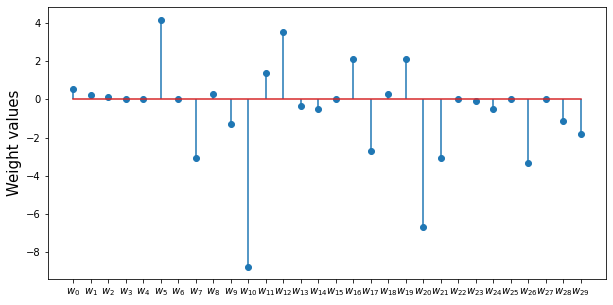

In [21]:
plt.figure(figsize=(10,5))
plt.stem(w)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(30), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0);

Since features 5, 10, 12, 20, and 26 have the largest magnitudes, they are the most informative to make the final prediction

#### 6. Recall that the Logistic Regression mapper function looks like $\mathbf{y} = \phi(z)$ where $z=\mathbf{w}^T\mathbf{x} +w_0$. Moreover, $y = \begin{cases}1, & z\geq 0\\0, & z<0\end{cases}$. Predict the values for $z$ for the training set. These values can be accessed with the attribute ```decision_function```.



In [22]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(final_model_log_reg, X_train, t_train,
                            cv=10, method='decision_function')

y_scores

array([ 3.58271977e+00,  2.65113312e-01, -1.84756047e+01,  7.69972691e+00,
        1.73511661e+01,  5.09855281e+00, -2.54301062e+01,  1.56408749e+01,
        1.02467796e+01,  1.83763158e+01,  3.86320410e+00,  1.11160297e+01,
       -1.97539724e+01,  6.83119961e+00,  2.54659999e+00,  6.16227932e+00,
        5.71056129e+00,  4.32361474e+00,  7.30052201e+00, -1.60872173e+01,
        9.41666650e+00,  9.22466210e+00,  6.52427794e+00,  1.03596344e+01,
        1.08130447e+01, -4.49251679e+00,  2.77284838e+00, -2.27897586e+01,
        2.31799276e+01,  1.59623194e+01, -2.00941764e+01,  1.06727181e+01,
        1.22114399e+01, -2.77899519e+01, -2.89891153e+01,  1.31311255e+01,
       -2.62613345e+01,  8.13113035e+00, -7.73806888e+00, -1.32841513e+01,
        3.31964330e+01, -1.45886702e+01, -1.35540005e+01,  7.34148519e+00,
       -2.04685406e+01, -8.62467377e+00,  4.15305017e+00, -1.53129037e+01,
        1.65228831e+01,  1.03703589e+01,  1.20521029e+01,  6.97569829e+00,
       -1.60506835e+00,  

#### 7. Now consider $y = \begin{cases}1, & z\geq \delta\\0, & z<\delta\end{cases}$, where $\delta\in\mathbb{R}$ is threshold continuous value. Plot the **precision-recall curve**. Which threshold $\delta$ would you use to obtain a **recall of at least 80%**? Justify your answer based on these results.


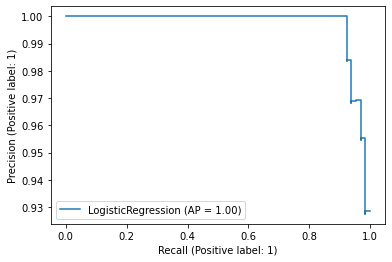

In [27]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(t_train,y_scores)

recall_80_precision = recall[np.argmax(precision >= 0.80)]
threshold_80_precision = thresholds[np.argmax(precision >= 0.80)]
precision_80_precision = precision[np.argmax(precision >= 0.80)]

display = PrecisionRecallDisplay.from_estimator(final_model_log_reg, X_test,t_test)

In [29]:
threshold_80_precision = thresholds[np.argmax(precision >= 0.80)]
threshold_80_precision

-1.7490603985669015

In [30]:
from sklearn.metrics import precision_score, recall_score

y_train_pred_80 = (y_scores >= threshold_80_precision) 
precision_score(t_train, y_train_pred_80) 

0.948051948051948

In [31]:
recall_score(t_train, y_train_pred_80)

1.0

I would choose threshold of -1.749 due to its recall socre and precision score

#### 8. Use the newly found threshold value to make predictions for the test set. Compare the results with those from part 4.

In [32]:
#make predictions 
threshold = -1.7490603985669015;
y_scores_test = cross_val_predict(final_model_log_reg, X_test, t_test,
                            cv=10, method='decision_function')
y_train = (y_scores > threshold)
y_test = (y_scores_test>threshold)
target_names = ['malignant', 'benign']
print(classification_report(t_train,y_train, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.99      0.90      0.95       163
      benign       0.95      1.00      0.97       292

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455



In [33]:
print(classification_report(t_test,y_test, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        49
      benign       0.98      0.98      0.98        65

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



The precision and recall scores for the test set is higher here than in part 4.

---

# Question 2

In this problem you will work with the [Immunotherapy dataset](https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset). 

This dataset contains information about wart treatment results of 90 patients using immunotherapy. There are 7 features (sex, age, time, number of warts, type, area and induration diameter). The target label is the column "Result_of_Treatment", where 0 means not successful and 1 means the treatment was successful.

In [34]:
import pandas as pd

df = pd.read_excel('Immunotherapy.xlsx')

df

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
...,...,...,...,...,...,...,...,...
85,1,40,5.50,8,3,69,5,1
86,1,38,7.50,8,2,56,45,1
87,1,46,11.50,4,1,91,25,0
88,1,32,12.00,9,1,43,50,0


Answer the following questions:

1. Partition the data into training and test using a stratified 80/20 partition. For reproducible, fix the value for the ```random_state``` parameter.

2. Build a pipeline that includes data preprocessing and a decision tree classifier with ```random_state=0```.
    * For data preprocessing, use one-hot encoding for categorical attributes (```sex``` and ``` Type```) and min-max scaling for all other numerical attributes. Use the ```ColumnTransform``` function.

3. Carry hyperparameter tuning using grid search to experiment with ```criterion```, ```max_depth```, ```min_samples_split``` and ```min_samples_leaf```. Train the final model pipeline.

4. Visualize the resulting decision tree.

5. Evaluate performance in training and test sets.

#### 1. Partition the data into training and test using a stratified 80/20 partition. For reproducible, fix the value for the ```random_state``` parameter.



In [35]:
corr_matrix = df.corr(method='pearson');
corr_matrix['Result_of_Treatment'].sort_values(ascending=False)

Result_of_Treatment    1.000000
Type                   0.083396
Area                   0.043349
sex                    0.018831
induration_diameter   -0.031273
Number_of_Warts       -0.047160
age                   -0.188314
Time                  -0.361172
Name: Result_of_Treatment, dtype: float64

'Time' has the largest predictive value

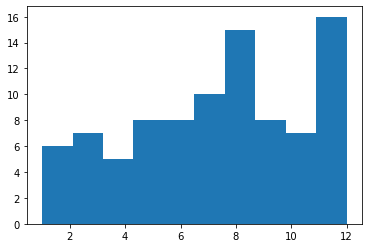

In [36]:
plt.hist(df['Time']);

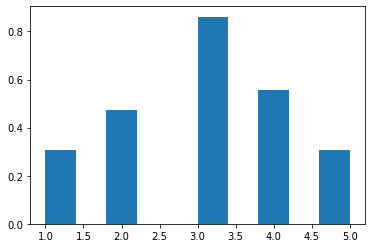

In [37]:
# train-test split with stratification
time_cat = pd.cut(df['Time'],
                 bins=[0.,2.5,5.5,8.5,11,np.inf],
                 labels=[1,2,3,4,5])
plt.hist(time_cat, density=True);

In [38]:
train, test, cat_train, cat_test = train_test_split(df, 
                                                    time_cat,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42,
                                                   stratify=time_cat)

#### 2. Build a pipeline that includes data preprocessing and a decision tree classifier with ```random_state=0```.
   * For data preprocessing, use one-hot encoding for categorical attributes (```sex``` and ``` Type```) and min-max scaling for all other numerical attributes. Use the ```ColumnTransform``` function.


In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

num_train = train.drop(['sex','Type'], axis=1)

#attribute encoding
num_attribs = list(num_train.columns)
cat_attribs = ['sex','Type']

#pipeline for numerical attributes
num_pipeline = Pipeline([('min_max_scaler', MinMaxScaler())])

# complete pipeline
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                  ('cat', OneHotEncoder(), cat_attribs)])

train_set_prepared = full_pipeline.fit_transform(train)
test_set_prepared = full_pipeline.transform(test)

# In pandas dataframe format
training_set = pd.DataFrame(train_set_prepared, 
                           columns=np.hstack((num_attribs, 
                                              ['Cat1','Cat2','Cat3','Cat4','Cat5'])), 
                           index=train.index)
X_train = training_set.drop('Result_of_Treatment', axis=1).to_numpy()
t_train = training_set['Result_of_Treatment'].to_numpy()

test_set = pd.DataFrame(test_set_prepared, 
                           columns=np.hstack((num_attribs, 
                                              ['Cat1','Cat2','Cat3','Cat4','Cat5'])), 
                           index=test.index)

X_test = test_set.drop('Result_of_Treatment', axis=1).to_numpy()
t_test = test_set['Result_of_Treatment'].to_numpy()

In [40]:
X_train.shape, t_train.shape, X_test.shape, t_test.shape

((72, 10), (72,), (18, 10), (18,))

In [41]:
DTree = DecisionTreeClassifier(random_state=0)
dt_pipe=Pipeline([('dt', DTree)])

#### 3. Carry hyperparameter tuning using grid search to experiment with ```criterion```, ```max_depth```, ```min_samples_split``` and ```min_samples_leaf```. Train the final model pipeline.



In [42]:
param_grid={'dt__criterion':['gini', 'entropy'],
            'dt__max_depth':np.arange(1,30),
            'dt__min_samples_split':np.arange(2,10),
            'dt__min_samples_leaf':np.arange(1,10)}
grid_search_dt = GridSearchCV(dt_pipe,
                             param_grid=param_grid,
                             cv=5,
                             scoring='neg_mean_squared_error',
                             refit=True)
grid_search_dt.fit(X_train, t_train);

print(grid_search_dt.best_params_)

{'dt__criterion': 'gini', 'dt__max_depth': 2, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}


In [43]:
final_dt = DecisionTreeClassifier(criterion='gini', max_depth=2,
                                 min_samples_leaf=4, min_samples_split=2,
                                 random_state=0)

#### 4. Visualize the resulting decision tree.



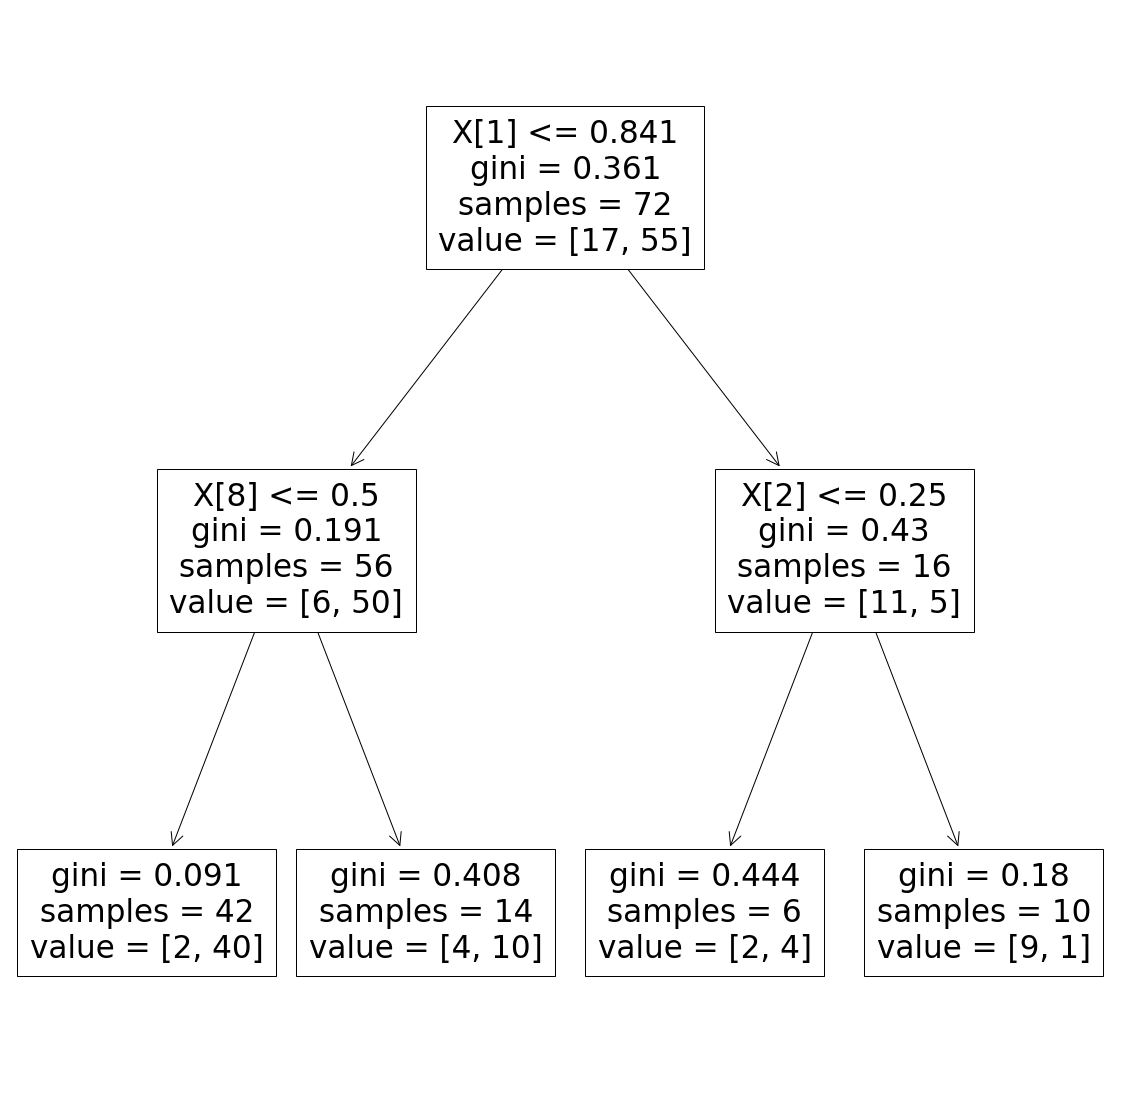

In [44]:
from sklearn import tree

plt.figure(figsize=(20,20))

tree.plot_tree(final_dt.fit(X_train, t_train));
plt.show()

#### 5. Evaluate performance in training and test sets.

In [45]:
y_train = final_dt.predict(X_train)
y_test = final_dt.predict(X_test)
target_names = ['not successful', 'successful']
print(classification_report(t_train,y_train, target_names=target_names))

                precision    recall  f1-score   support

not successful       0.90      0.53      0.67        17
    successful       0.87      0.98      0.92        55

      accuracy                           0.88        72
     macro avg       0.89      0.76      0.79        72
  weighted avg       0.88      0.88      0.86        72



In [46]:
print(classification_report(t_test,y_test, target_names=target_names))

                precision    recall  f1-score   support

not successful       1.00      0.50      0.67         2
    successful       0.94      1.00      0.97        16

      accuracy                           0.94        18
     macro avg       0.97      0.75      0.82        18
  weighted avg       0.95      0.94      0.94        18



---

# Question 3

In this problem you will be working with the [Digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

Each sample corresponds to an $8 \times 8$ gray image of a handwritten digit. There is a total of 10 digits or labels ($0, 1, 2, \dots, 9$). The dataset contains 1797 samples.

In [47]:
from sklearn.datasets import load_digits

digits = load_digits(return_X_y=False)

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [48]:
# Obtaining data

# Each row corresponds to an image with 8x8=64 pixels/features
X = digits.data 

# Labels
t = digits.target

X.shape, t.shape

((1797, 64), (1797,))

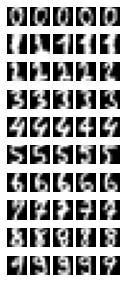

In [49]:
# displaying some examples of digits

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

plt.figure(figsize=(2,5))
grid_loc=1
for i in range(10):
    digits_labels_idx = np.where(t==i)[0]
    idx = np.random.randint(len(digits_labels_idx),size=5)
    for j in range(5):
        plt.subplot(10,5,grid_loc)
        plt.imshow(X[digits_labels_idx[idx[j]],:].reshape(8,8), cmap='gray')
        plt.axis('off')
        grid_loc+=1

Answer the following questions:

1. Partition the data into training and test using a stratified 80/20 partition. For reproducible, fix the value for the ```random_state``` parameter.

2. Build a pipeline that includes data preprocessing and a random forest classifier with ```random_state=0```.
    * For data preprocessing, use the min-max scaler.

3. Carry hyperparameter tuning using grid search to experiment with number of trees, ```criterion```, ```max_depth```, ```min_samples_split``` and ```min_samples_leaf```. Train the final model pipeline.

4. Print the ```feature_importance_``` for the final model. Reshape this vector as an $8\times 8$ image and display it with ```imshow```. Discuss observations.

5. Evaluate performance in training and test sets.

#### 1. Partition the data into training and test using a stratified 80/20 partition. For reproducible, fix the value for the ```random_state``` parameter.


In [50]:
X_train, X_test, t_train, t_test = train_test_split(X,t,
                                               test_size=0.2,
                                               shuffle=True,
                                               random_state=42)

#### 2. Build a pipeline that includes data preprocessing and a random forest classifier with ```random_state=0```.
    * For data preprocessing, use the min-max scaler.



In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
pipe = Pipeline([('min_max_scaler', MinMaxScaler()),
                ('model', model)])
pipe.get_params()

{'memory': None,
 'steps': [('min_max_scaler', MinMaxScaler()),
  ('model', RandomForestClassifier(random_state=0))],
 'verbose': False,
 'min_max_scaler': MinMaxScaler(),
 'model': RandomForestClassifier(random_state=0),
 'min_max_scaler__clip': False,
 'min_max_scaler__copy': True,
 'min_max_scaler__feature_range': (0, 1),
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'auto',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': 0,
 'model__verbose': 0,
 'model__warm_start': False}

#### 3. Carry hyperparameter tuning using grid search to experiment with number of trees, ```criterion```, ```max_depth```, ```min_samples_split``` and ```min_samples_leaf```. Train the final model pipeline.



In [52]:
param_grid={'model__criterion':['gini', 'entropy'],
           'model__max_depth':np.arange(2,10),
           'model__min_samples_split':np.arange(2,5),
           'model__min_samples_leaf':np.arange(1,5)}

grid_search_rfc = GridSearchCV(pipe,
                              param_grid=param_grid,
                              cv=5,
                              scoring='neg_mean_squared_error')
grid_search_rfc.fit(X_train, t_train);
print(grid_search_rfc.best_params_)

{'model__criterion': 'entropy', 'model__max_depth': 8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 3}


In [53]:
final_model_rfc = grid_search_rfc.best_estimator_

#### 4. Print the ```feature_importance_``` for the final model. Reshape this vector as an $8\times 8$ image and display it with ```imshow```. Discuss observations.



In [54]:
final_model_rfc.named_steps['model'].feature_importances_

array([0.00000000e+00, 1.41042371e-03, 2.20375529e-02, 8.49282230e-03,
       5.33277452e-03, 1.53930078e-02, 5.12094704e-03, 5.16842874e-04,
       3.18684693e-05, 9.78979320e-03, 2.71522726e-02, 4.35634583e-03,
       1.12781735e-02, 2.17366146e-02, 4.03389123e-03, 2.52951783e-04,
       1.47272174e-05, 4.88367753e-03, 1.67158274e-02, 2.16712512e-02,
       2.77482675e-02, 6.36081548e-02, 9.28632520e-03, 1.50195146e-04,
       5.71867403e-05, 1.19440382e-02, 4.93673654e-02, 2.45121393e-02,
       3.07460272e-02, 1.82314851e-02, 4.04562410e-02, 7.75992657e-05,
       0.00000000e+00, 3.37982742e-02, 3.20568245e-02, 1.73545686e-02,
       3.60411487e-02, 1.61058220e-02, 3.91499075e-02, 0.00000000e+00,
       2.45568749e-05, 5.21364812e-03, 5.55069987e-02, 5.50690069e-02,
       1.99956594e-02, 1.44611185e-02, 1.99223988e-02, 1.56325840e-05,
       5.39318879e-05, 1.28562555e-03, 1.35631201e-02, 1.59619355e-02,
       1.11714863e-02, 2.25394374e-02, 3.63328229e-02, 1.16851660e-03,
      

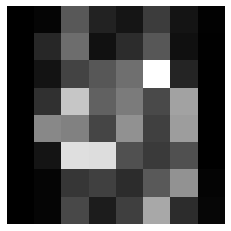

In [55]:
img = final_model_rfc.named_steps['model'].feature_importances_.reshape(8,8);
plt.imshow(img, cmap='gray') 
plt.axis('off');

/var/folders/1_/2tjx84411dl0n9rvnrjdns8c0000gn/T/ipykernel_44382/964915464.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


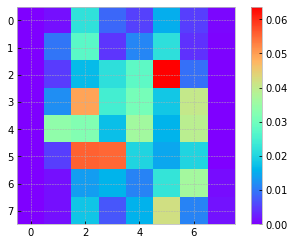

In [56]:
plt.imshow(final_model_rfc['model'].feature_importances_.reshape(8,8), cmap=plt.cm.rainbow)
plt.colorbar();

The image is hard to read but it looks like a 8, since most of its concentration is on the center of the loop

#### 5. Evaluate performance in training and test sets.

In [57]:
y_test = final_model_rfc.predict(X_test)
y_train = final_model_rfc.predict(X_train)
print(classification_report(t_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       135
           5       1.00      0.99      1.00       135
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       145
           8       0.99      1.00      1.00       144
           9       0.99      0.99      0.99       140

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



In [58]:
print(classification_report(t_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.94      0.97      0.96        34
           8       1.00      1.00      1.00        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



The precision score seems to be higher than the recall for both cases.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___